<a href="https://colab.research.google.com/github/Natalia409634/Grupo7-practica1-ML/blob/main/Copy_of_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de la producción de energía solar**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd   
# Instalar statsmodels para intervalos de confianza 
!pip install statsmodels

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lectura de datos


In [29]:
disp_df = pd.read_csv("/content/drive/MyDrive/Aprendizaje Automático/datos practica/disp_st7ns1.txt.bz2",compression="bz2",index_col=0)


comp_df = pd.read_csv("/content/drive/MyDrive/Aprendizaje Automático/datos practica/comp_st7ns1.txt.bz2", compression="bz2", index_col=0)

# Análisis Exploratorio de datos -> 19 de marzo



1.   Comprender la anturaleza de los datos
2.   Identificar y tratar los datos faltantes
3.   Analizar la distribución de las variables
4.   Identificar valores atípicos
5.   Analizar la relación entre las variables
6.   Identificar patrones y tendencias
7.   Visualizar los resultados





In [4]:
disp_df.head()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.0,0.0,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,...,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.0,0.0,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,...,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.0,0.0,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,...,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.0,0.0,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,...,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.0,0.0,0.000000,0.000000,241.344566,244.017960,252.214458,295.031791,304.845553,...,237.979387,243.498259,243.310007,222.655228,0,7.909091,49.454545,106.363636,68.545455,6411300


In [5]:
comp_df.head()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1
V4381,0.0,0.0,0.0,0.0,0.0,270.041357,266.721902,271.436185,289.260481,290.198866,...,249.005188,246.327445,254.430893,271.488123,263.904726,0,8.000000,49.000000,111.818182,76.272727
V4382,0.0,0.0,0.0,0.0,0.0,268.203194,251.082065,252.520158,265.459176,266.033655,...,248.806734,246.361692,252.809210,261.484716,252.373657,0,8.000000,51.000000,115.545455,78.909091
V4383,0.0,0.0,0.0,0.0,0.0,259.093084,253.669977,262.735166,298.541923,293.522200,...,221.154437,238.409930,234.933735,210.958496,228.914555,0,7.818182,45.272727,94.090909,66.727273
V4384,0.0,0.0,0.0,0.0,0.0,285.385701,290.056355,289.864347,289.696259,287.767661,...,230.637607,236.175475,244.932745,292.169112,287.461126,0,5.545455,46.545455,116.727273,81.727273
V4385,0.0,0.0,0.0,0.0,0.0,276.592293,266.611287,268.892875,283.150868,282.253951,...,256.840331,242.059387,252.194519,276.955666,275.521393,0,7.727273,49.636364,115.272727,80.454545


In [6]:
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [7]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, V4381 to V5113
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  733 non-null    float64
 1   apcp_sf2_1  733 non-null    float64
 2   apcp_sf3_1  733 non-null    float64
 3   apcp_sf4_1  733 non-null    float64
 4   apcp_sf5_1  733 non-null    float64
 5   dlwrf_s1_1  733 non-null    float64
 6   dlwrf_s2_1  733 non-null    float64
 7   dlwrf_s3_1  733 non-null    float64
 8   dlwrf_s4_1  733 non-null    float64
 9   dlwrf_s5_1  733 non-null    float64
 10  dswrf_s1_1  733 non-null    float64
 11  dswrf_s2_1  733 non-null    float64
 12  dswrf_s3_1  733 non-null    float64
 13  dswrf_s4_1  733 non-null    float64
 14  dswrf_s5_1  733 non-null    float64
 15  pres_ms1_1  733 non-null    float64
 16  pres_ms2_1  733 non-null    float64
 17  pres_ms3_1  733 non-null    float64
 18  pres_ms4_1  733 non-null    float64
 19  pres_ms5_1  733 non-null    

## Dibujamos el conjunto de datos

Integración de pandas con matplotlib

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
df_X = pd.DataFrame(disp_df)


Histograma de algunas variables

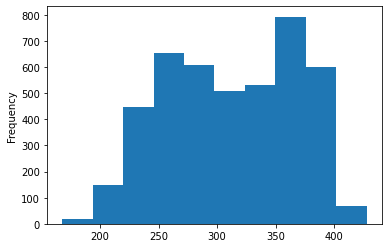

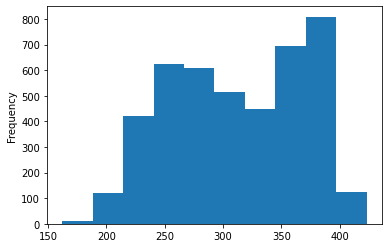

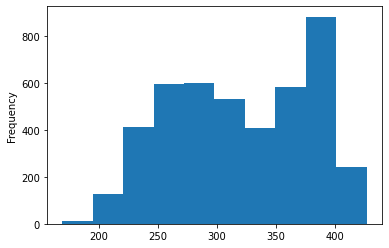

In [19]:
df_X.dlwrf_s1_1.plot.hist()
plt.show()

df_X.dlwrf_s2_1.plot.hist()
plt.show()

df_X.dlwrf_s3_1.plot.hist()
plt.show()

### ¿Cuál es la mejor variable de entrada que nos permite separar las distintas clases?

In [22]:
import seaborn as sns
import pandas as pd

# 4. Dividir los datos en train (los 10 primeros años) y test (los dos últimos)

Para comenzar, dividimos los datos en dos conjuntos

In [30]:
import pandas as pd
#Preguntar que variable es DATE-> No la encuentro
#Crear 2 conjuntos
"""train_Data-> 
test_data->

"""



In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

Visualización gráfica del árbol

AttributeError: ignored

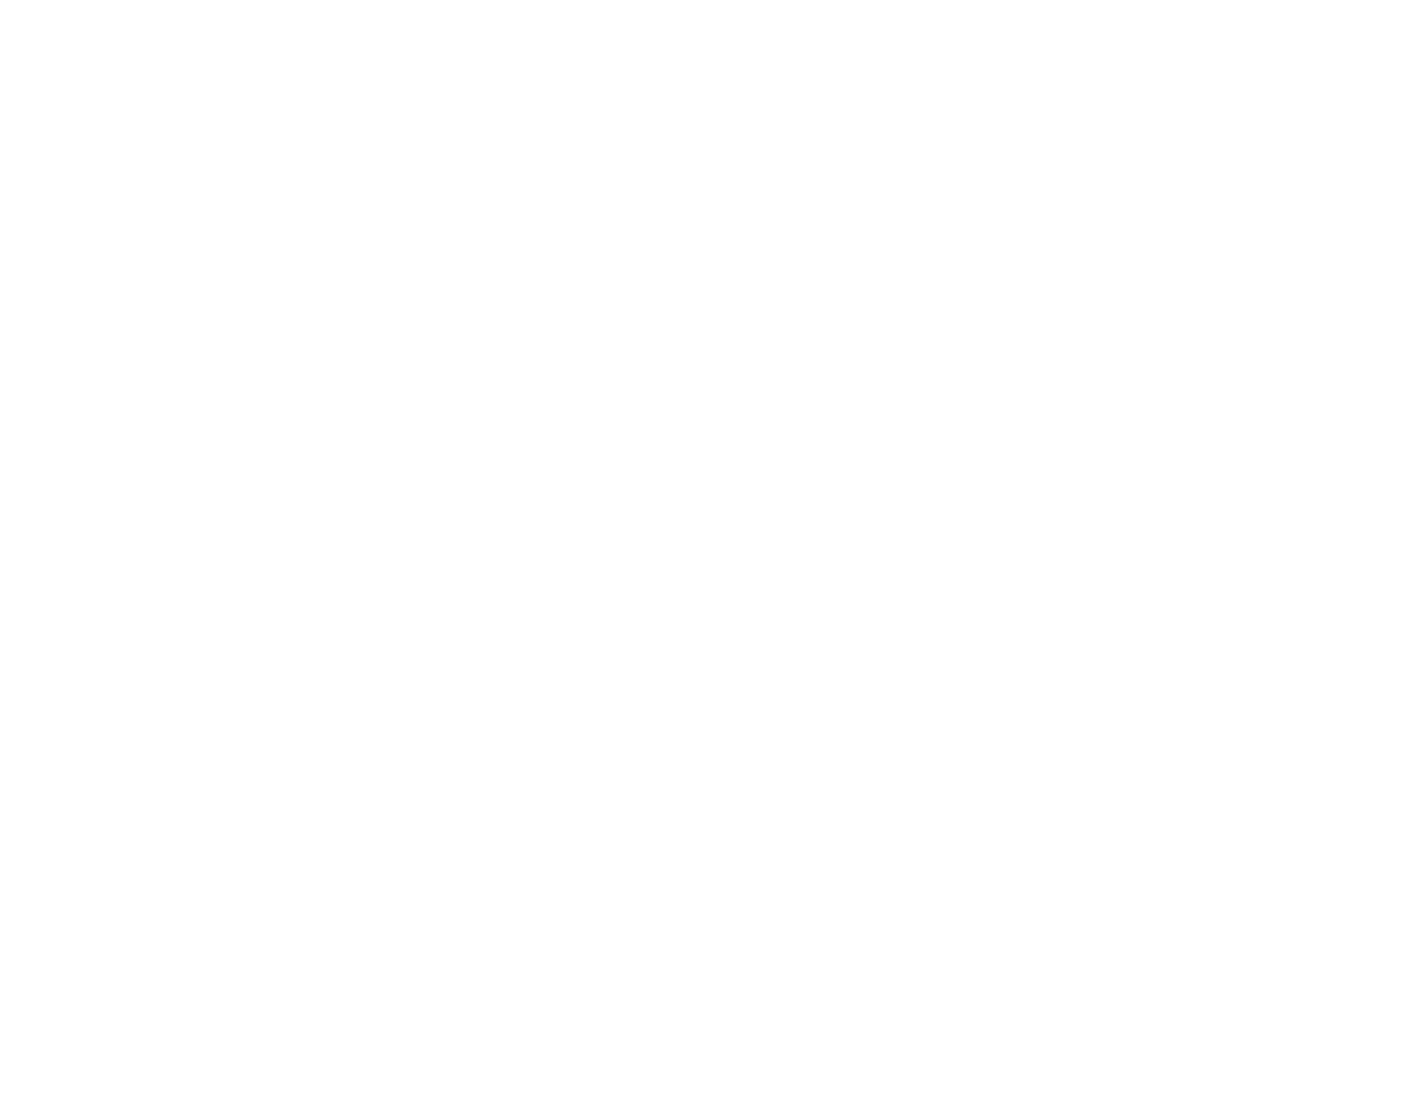

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = disp_df,class_names=comp_df, filled=True)



# 5.Métodos básicos

*   KNN
*   Árboles de regresión
*   Regresión lineal






## K-NN

In [33]:
from sklearn.model_selection import train_test_split

# 6.Dimensionalidad del problema

# 7. Métodos avanzados: SVMs, Random Forests

# 8. Modelo final